# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# чтение файла
data_flat = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# получение общей информации о данных в таблице clien_data
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
# получение первых 5 строк таблицы clien_data
data_flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


### Вывод

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропуски значения.

В данных видны пропуски в многих столбцах. Это может быть вызвано ошибками при внесение данных или ошибках при выгрузке.

### Шаг 2. Предобработка данных

In [4]:
# суммарное количество пропусков
data_flat.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# Пример
data_flat[['floor', 'floors_total']].query("floors_total.isna()")

,floor,floors_total
186,4,nan
237,1,nan
457,12,nan
671,8,nan
1757,9,nan
...,...,...
22542,3,nan
22656,20,nan
22808,6,nan
23590,18,nan


In [6]:
# замена пропущенных значений в столбце balcony на 0, так как вероятнее имелось в виду что в квартире нет балконов
data_flat['balcony'] = data_flat['balcony'].fillna(0)

# замена пропущенных значений в столбце is_apartment на False так как вероятнее всего имелось в виду что это не апартаменты
data_flat['is_apartment'] = data_flat['is_apartment'].fillna(False)

# замена нулевых значений в кол-ве комнат на 1, так площадь квартир соответсвует студии или однокомнатной
data_flat['rooms'] = data_flat['rooms'].replace(0, 1)

# удаление пропущенных значений в столбце 'floors_total' так как их всего 86
data_flat.dropna(subset=['floors_total'], inplace = True)

In [7]:
data_flat.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.00,23613.00,23613.00,23613.00,14495.00,23613.00,21743.00,23613.00,21382.00,23613.00,18081.00,18104.00,18105.00,8045.00,18105.00,9061.00,20441.00
mean,9.87,6540555.46,60.34,2.08,2.77,10.67,34.46,5.88,10.56,0.59,28788.01,14185.08,0.61,490.55,0.77,518.21,180.88
std,5.68,10901722.74,35.65,1.07,1.26,6.60,22.04,4.87,5.90,0.96,12626.21,8614.13,0.80,341.34,0.94,277.89,219.69
min,0.00,12190.00,12.00,1.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18575.00,9233.75,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,26726.00,13093.00,0.00,455.00,1.00,503.00,95.00
75%,14.00,6799000.00,69.80,3.00,2.80,16.00,42.30,8.00,12.00,1.00,37242.00,16287.00,1.00,612.00,1.00,730.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [8]:
# замена пропущенных значений в столбце ceiling_height
height_median = data_flat['ceiling_height'].median()
data_flat['ceiling_height'] = data_flat['ceiling_height'].fillna(height_median)

In [9]:
# замена пропущенных значений в столбце living_area на среднее значения по группам в зависимости от колл-ва комнат
data_flat["living_area"] = data_flat.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.mean()))

# замена пропущенных значений в столбце kitchen_area на среднее значения по группам в зависимости от колл-ва комнат
data_flat["kitchen_area"] = data_flat.groupby('rooms')['kitchen_area'].transform(lambda x: x.fillna(x.mean()))

# выполнил проверку на соотношение общей площади ["kitchen_area"] + ["living_area"] и удалим выбросы
data_flat["ratio_area"] = (data_flat["kitchen_area"] + data_flat["living_area"]) <= data_flat["total_area"]
data_flat = data_flat.query('ratio_area == True')

In [10]:
# # замена пропущенных значений в столбце days_exposition на median значения по группам в зависимости от колл-ва комнат
data_flat["days_exposition"] = data_flat.groupby('rooms')['days_exposition'].transform(lambda x: x.fillna(x.median()))

In [11]:
# осталаичь пропуски в квартирах у которых 0 комнат. Это студии, так как у них кухня и комната в оюном помещение, 
# заменим пропуски на 3, это более соответвует площади квартиры.
data_flat['kitchen_area'] = data_flat['kitchen_area'].fillna(3)

In [12]:
# удаление пропущенных значений в столбце locality_name
data_flat.dropna(subset = ['locality_name' ], inplace = True)

data_flat['locality_name'].unique()
data_flat['locality_name'] = data_flat['locality_name'].astype('str')
types = {'город', 'поселок', 'посёлок', 'городского', 'типа', 'городской',
         'коттеджный','станции', 'село','деревня','при','железнодорожной'}
def name(text):
    line = set(text.split())
    loc_name = line - types
    return str(loc_name)[2:-2]

data_flat['loc_name'] = data_flat['locality_name'].apply(name)

In [13]:
# замена пропущенных значений в столбцах  на медианное значения по группам в зависимости от местоположения
data_flat["airports_nearest"] = data_flat.groupby('loc_name')['airports_nearest'].transform(lambda x: x.fillna(x.median()))
data_flat["cityCenters_nearest"] = data_flat.groupby('loc_name')['cityCenters_nearest'].transform(lambda x: x.fillna(x.median()))
data_flat["parks_around3000"] = data_flat.groupby('loc_name')['parks_around3000'].transform(lambda x: x.fillna(x.median()))
data_flat["parks_nearest"] = data_flat.groupby('loc_name')['parks_nearest'].transform(lambda x: x.fillna(x.median()))
data_flat["ponds_around3000"] = data_flat.groupby('loc_name')['ponds_around3000'].transform(lambda x: x.fillna(x.median()))
data_flat["ponds_nearest"] = data_flat.groupby('loc_name')['ponds_nearest'].transform(lambda x: x.fillna(x.median()))

# замена пропущенных значений в столбцах  на медианное значения
airports_nearest_median = data_flat['airports_nearest'].median()
data_flat['airports_nearest'] = data_flat['airports_nearest'].fillna(airports_nearest_median)

cityCenters_nearest_median = data_flat['cityCenters_nearest'].median()
data_flat['cityCenters_nearest'] = data_flat['cityCenters_nearest'].fillna(cityCenters_nearest_median)

parks_around3000_median = data_flat['parks_around3000'].median()
data_flat['parks_around3000'] = data_flat['parks_around3000'].fillna(cityCenters_nearest_median)

parks_nearest_median = data_flat['parks_nearest'].median()
data_flat['parks_nearest'] = data_flat['parks_nearest'].fillna(parks_nearest_median)

ponds_around3000_median = data_flat['ponds_around3000'].median()
data_flat['ponds_around3000'] = data_flat['ponds_around3000'].fillna(ponds_around3000_median)

ponds_nearest_median = data_flat['ponds_nearest'].median()
data_flat['ponds_nearest'] = data_flat['ponds_nearest'].fillna(ponds_nearest_median)

data_flat.isnull().sum()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
ratio_area              0
loc_name                0
dtype: int64

In [14]:
# ПРОВЕРИ количества дубликатов в таблице data_flat
data_flat.duplicated().sum()

0

In [15]:
# поменяю тип данных в столбце first_day_exposition на формат даты
data_flat['first_day_exposition'] = pd.to_datetime(data_flat['first_day_exposition'], format='%Y-%m-%d %H:%M')
# заменяем вещественный тип данных на целочисленный методом astype('int')
#data_flat['floors_total'] = data_flat['floors_total'].astype('int')
data_flat['last_price'] = data_flat['last_price'].astype('int')
data_flat['balcony'] = data_flat['balcony'].astype('int')
data_flat['days_exposition'] = data_flat['days_exposition'].astype('int')
#data_flat[''] = data_flat[''].astype('int')

### Вывод

На данном этапе привели данные к общему виду, убрали пропуски, провели проверку на наличие дубликатов.

### Шаг 3. Посчитайте и добавьте в таблицу

In [16]:
# для рассчета цены квадратного метра напишу функцию
def price_per_meter(data_flat):
    total_price = data_flat['last_price']
    total_area = data_flat['total_area']
    price_meter = total_price / total_area
    return price_meter

# Исмользуем метоб .apply чтобы применить функцию 
data_flat['price_per_meter'] = data_flat.apply(price_per_meter, axis=1).astype('int')

In [17]:
# функция для оделения года из столбца дата публикации
def years(data_flat):
    years_exp = data_flat['first_day_exposition'].year
    return years_exp

# функция для оделения дня из столбца дата публикации
def day(data_flat):
    day_exp = data_flat['first_day_exposition'].day
    return day_exp

# функция для оделения месяца из столбца дата публикации
def month(data_flat):
    month_exp = data_flat['first_day_exposition'].month
    return month_exp

# Исмользуем метоб .apply чтобы применить функции
data_flat['day'] = data_flat.apply(day, axis=1)
data_flat['month'] = data_flat.apply(month, axis=1)
data_flat['years_exp'] = data_flat.apply(years, axis=1)

In [18]:
# функция для определения категории этажа напишу функцию
def floor_category(data_flat):
    floors_total = data_flat['floors_total']
    floor = data_flat['floor']
    if floor == 1:
        return 'Первый'
    if floor != 1 and floor != floors_total:
        return 'Другой'
    if floor == floors_total:
        return 'Последний'
        
# Исмользуем метоб .apply чтобы применить функцию 
data_flat['floor_category'] = data_flat.apply(floor_category, axis=1)

In [19]:
# функция для расчета доли жилой площади
def ratio_living_area(data_flat):
    living_area = data_flat['living_area']
    total_area = data_flat['total_area']
    ratio_living = living_area / total_area
    return ratio_living

# функция для расчета доли  площади кухни
def ratio_kitchen_area(data_flat):
    kitchen_area = data_flat['kitchen_area']
    total_area = data_flat['total_area']
    ratio_kitchen = kitchen_area / total_area
    return ratio_kitchen

# Исмользуем метоб .apply чтобы применить функции
data_flat['ratio_living_area'] = data_flat.apply(ratio_living_area, axis=1)
data_flat['ratio_kitchen_area'] = data_flat.apply(ratio_kitchen_area, axis=1)
data_flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ratio_area,loc_name,price_per_meter,day,month,years_exp,floor_category,ratio_living_area,ratio_kitchen_area
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,116,True,Санкт-Петербург,120370,7,3,2019,Другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,81,True,Шушары,82920,4,12,2018,Первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,558,True,Санкт-Петербург,92785,20,8,2015,Другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14.00,47.38,9,False,...,424,True,Санкт-Петербург,408176,24,7,2015,Другой,0.30,0.07
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,121,True,Санкт-Петербург,100000,19,6,2018,Другой,0.32,0.41


### Вывод

На данном этапе расчитали следующий данные и добавили их в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [20]:
# функция для построения 2 графиков
def boxprint(colum, bins):
    print(colum.describe())
    q1 = colum.quantile(0.25)
    q3 = colum.quantile(0.75)
    iqr = q3 - q1
    colum.hist(bins=bins, range=((q1-3*iqr), (q3+3*iqr)))
    plt.show()
    sns.boxplot(x=colum, color='red')
    

count   23073.00
mean       60.80
std        35.74
min        14.00
25%        40.40
50%        52.10
75%        70.00
max       900.00
Name: total_area, dtype: float64


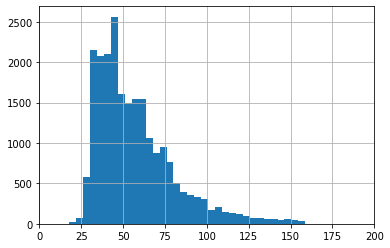

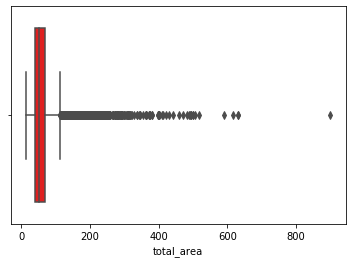

In [21]:
# изучены следующие параметры: площадь, цена, число комнат, высота потолков
# построены гистограммы для каждого параметра
plt.xlim(0, 200)
boxprint(data_flat['total_area'], 50)

count       23073.00
mean      6597648.14
std      10972845.62
min         12190.00
25%       3480000.00
50%       4690000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64


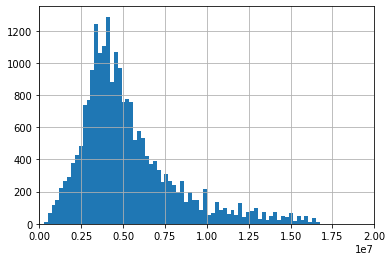

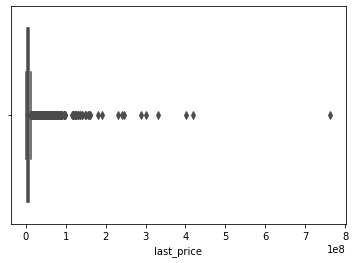

In [22]:
plt.xlim(0, 20000000.00)
boxprint(data_flat['last_price'], 100)

count   23073.00
mean        2.09
std         1.06
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64


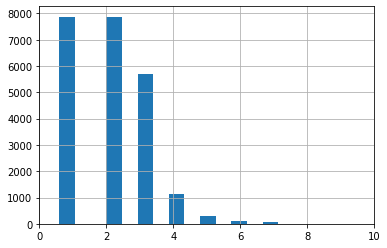

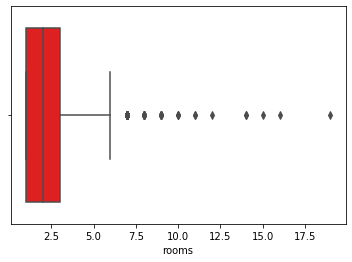

In [23]:
plt.xlim(0, 10)
boxprint(data_flat['rooms'], 30)

count   23073.00
mean        2.72
std         0.96
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64


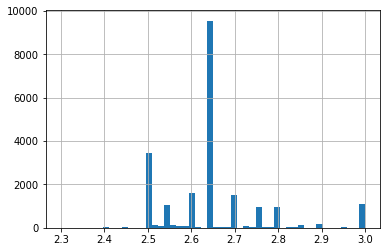

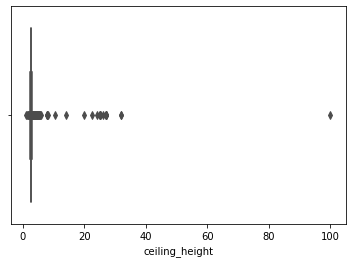

In [24]:
boxprint(data_flat['ceiling_height'], 50)

Изучим время продажи квартиры. 
Для этого построим гистограмму. Посчитаем среднее и медиану. 

Ответим на вопросы:
- Сколько обычно занимает продажа.
- Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [25]:
# посчитаем среднее значение времени продажи квартир
exposition_mean = data_flat['days_exposition'].mean()
# посчитаем медианное значение времени продажи квартир
exposition_median = data_flat['days_exposition'].median()

print(exposition_mean, exposition_median)

171.93711264248256 93.0


count   23073.00
mean      171.94
std       207.14
min         1.00
25%        46.00
50%        93.00
75%       201.00
max      1580.00
Name: days_exposition, dtype: float64


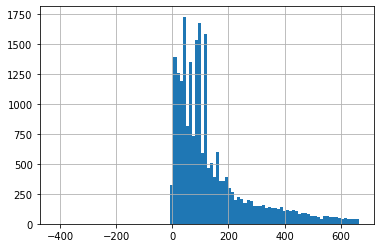

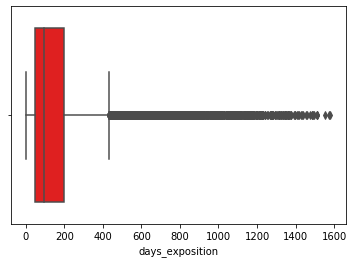

In [26]:
#data_flat['days_exposition'].hist(bins=100)
boxprint(data_flat['days_exposition'], 100)

Медиана по столбу days_exposition 92 дня при этом среднее 170.

75% квартир продается за срок менее 200 дней, при этом 25% за 45 дней.
Исходя из данных можно оставить данный при которых срок размещения объявлений от 10 до 800 дней

In [27]:
good_data_flat = data_flat.query('days_exposition > 10 and days_exposition < 800')
good_data_flat['days_exposition'].describe()

count   21271.00
mean      158.04
std       155.31
min        11.00
25%        56.00
50%        98.00
75%       197.00
max       799.00
Name: days_exposition, dtype: float64

In [28]:
# уберем выьросы и аномальные значений и данных
good_data_flat = good_data_flat.query('ceiling_height < 4')
good_data_flat = good_data_flat.query('rooms < 6')
good_data_flat = good_data_flat.query('total_area < 200')
good_data_flat = good_data_flat.query('last_price < 20000000')
good_data_flat.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day,month,years_exp,ratio_living_area,ratio_kitchen_area
count,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,...,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00,20441.00
mean,9.88,5398021.14,56.50,2.01,2.68,10.70,32.19,5.87,10.06,0.60,...,471.96,0.80,512.07,155.94,94432.57,15.49,6.38,2017.41,0.56,0.19
std,5.59,3140709.73,22.69,0.92,0.19,6.60,15.30,4.88,4.41,0.96,...,198.00,0.81,171.78,154.27,32485.68,8.67,3.49,0.99,0.10,0.07
min,0.00,430000.00,18.00,1.00,1.00,1.00,2.00,1.00,1.30,0.00,...,1.00,0.00,13.00,11.00,7962.00,1.00,1.00,2014.00,0.04,0.04
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,18.20,2.00,7.10,0.00,...,460.00,0.00,504.00,55.00,75492.00,8.00,3.00,2017.00,0.49,0.14
50%,9.00,4590000.00,51.10,2.00,2.65,9.00,30.00,4.00,9.50,0.00,...,460.00,1.00,504.00,95.00,93750.00,15.00,6.00,2017.00,0.57,0.18
75%,14.00,6500000.00,67.00,3.00,2.70,16.00,41.20,8.00,11.29,1.00,...,460.00,1.00,504.00,195.00,111876.00,23.00,10.00,2018.00,0.63,0.23
max,42.00,19999000.00,199.20,5.00,3.98,60.00,145.40,32.00,64.00,5.00,...,3190.00,3.00,1344.00,799.00,392354.00,31.00,12.00,2019.00,0.91,0.72


Ответим на следующзие вопросы зависит ли цена от:
- квадратного метра, 
- числа комнат, 
- удалённости от центра. 

Изучите зависимость цены от того, 
- на каком этаже расположена квартира: первом, последнем или другом. 

Также изучите зависимость от даты размещения: дня недели, месяца и года.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94ee2bb590>,
      dtype=object)

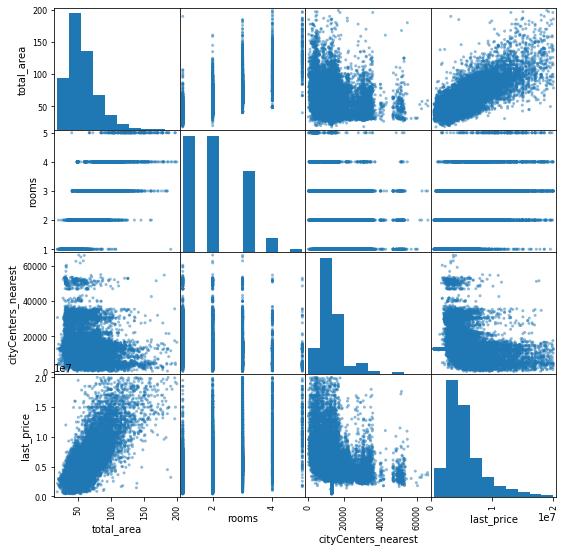

In [29]:
pd.plotting.scatter_matrix(good_data_flat[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']], figsize=(9, 9))

In [30]:
# рассчитаем коррецию для нескольких столбнов
good_data_flat[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']].corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.00,0.79,-0.16,0.77
rooms,0.79,1.00,-0.11,0.49
cityCenters_nearest,-0.16,-0.11,1.00,-0.27
last_price,0.77,0.49,-0.27,1.00


Наибольшая корреляция цены с общей площадбю и колличеством комнат.
Стоимость квартиры в большей степени зависит от этих параметров.

In [31]:
# 
good_data_flat.pivot_table(index='floor_category', values='price_per_meter')

,price_per_meter
floor_category,
Другой,98641.62
Первый,79588.79
Последний,85836.85


Квартиры на первом и последнем дешевле чем на промежуточных, при этом на первом этаже квартиры как правилдо самые дешевые.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94ee702c10>,
      dtype=object)

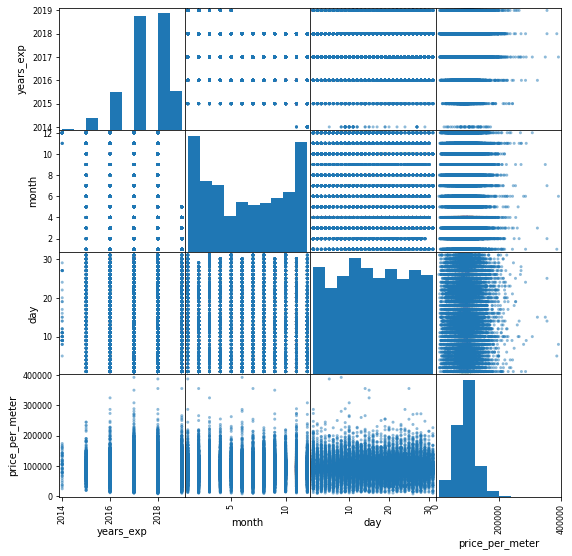

In [32]:
# 
pd.plotting.scatter_matrix(good_data_flat[['years_exp','month', 'day', 'price_per_meter']], figsize=(9, 9))

Наиболее показательны данные по годам, колличесов объявлений из года в год увеличивается.

В весение и ление месяцы наблюдается спад активности размещения объявлений наиожее популярные меяцы декабрь и январь

Четкой зависимости дням нет.

In [33]:
# создадим сводную таблицу и почитаем колличество объявлений по городам и среднею цену квадратного метра
good_data_pivot = (good_data_flat
                   .pivot_table(index='loc_name', values='price_per_meter',  aggfunc=['count', 'mean'])
)
good_data_pivot.columns = ['count', 'mean']
good_data_pivot.sort_values(by='count', ascending=False).head(10)


,count,mean
loc_name,,
Санкт-Петербург,13313,108570.91
Мурино,485,85645.08
Шушары,403,78148.42
Кудрово,399,94896.83
Всеволожск,358,67294.61
Пушкин,324,101365.26
Колпино,307,75033.51
Парголово,297,89902.68
Гатчина,273,68700.14


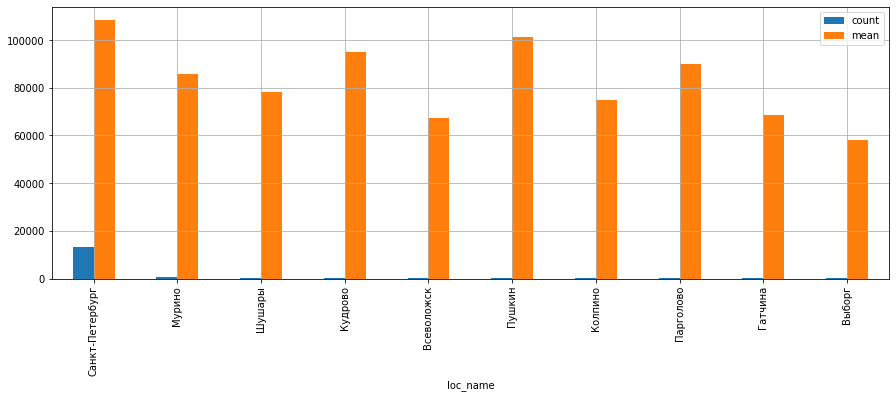

In [34]:
good_data_pivot.sort_values(by='count', ascending=False).head(10).plot(grid=True, kind='bar', figsize=(15, 5))

Количество объявлений в Санкт-Петербурге значительно первышает все остальные города
Минимальная цена в Выборге - 58 260.67Б самая дорогая цена в Санкт-Петербург 108 695.04


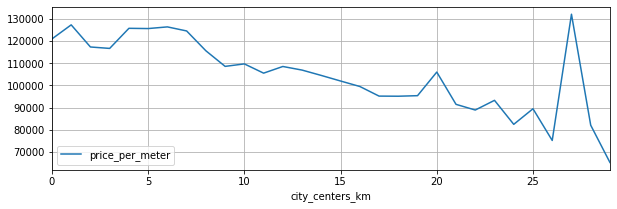

In [35]:
# добавим столбей с километрами до центра и окрублим до целого числа методом .astype('int')
good_data_flat['city_centers_km'] = (good_data_flat['cityCenters_nearest'] / 1000).astype('int')

#  напечатаем график с зависимостью цены от удаления от центра
(good_data_flat
     .query('loc_name == "Санкт-Петербург"')
     .pivot_table(index='city_centers_km', values='price_per_meter', aggfunc='mean')
     .plot(grid=True, figsize=(10, 3))
)

Наибольшая цена приходится на растояние до 9 км. Для этиъ квартир стоимость метра более 110 000.

In [36]:
# площадь, цена, число комнат, высота потолков
data_flat_spb_9km = (good_data_flat
                 .query('loc_name == "Санкт-Петербург" and city_centers_km < 9')
)
data_flat_spb_9km[['total_area', 'rooms', 'ceiling_height', 'last_price']].corr()

,total_area,rooms,ceiling_height,last_price
total_area,1.00,0.80,0.29,0.74
rooms,0.80,1.00,0.26,0.48
ceiling_height,0.29,0.26,1.00,0.24
last_price,0.74,0.48,0.24,1.00


Наибольшая зависимость стоиости квартриы от общей площади, эти данные  совпадают общей картиной, при этом корреляция с колличесвом комнат меньше. Можно сделать выводы, что в центре в большей степени на стоимость квартиры влияет площадь, а колличество комнат второстепенный показатель.

In [37]:
# площадь, цена, число комнат, высота потолков
data_flat_spb = (good_data_flat
                 .query('loc_name == "Санкт-Петербург"')
)
data_flat_spb[['total_area', 'rooms', 'ceiling_height', 'last_price']].corr()

,total_area,rooms,ceiling_height,last_price
total_area,1.00,0.79,0.37,0.82
rooms,0.79,1.00,0.20,0.53
ceiling_height,0.37,0.20,1.00,0.41
last_price,0.82,0.53,0.41,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94ee1aded0>,
      dtype=object)

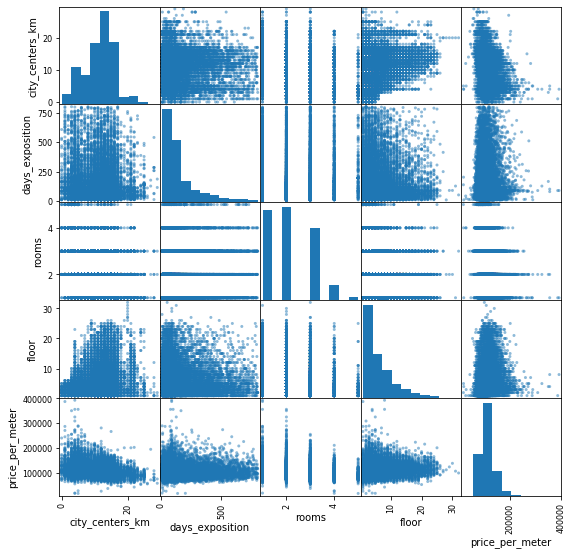

In [38]:
# число комнат, этаж, удалённость от центра, дата размещения объявления
data_flat_spb = (good_data_flat
                 .query('loc_name == "Санкт-Петербург"')
)
pd.plotting.scatter_matrix(
    data_flat_spb[['city_centers_km', 'days_exposition', 'rooms', 'floor', 'price_per_meter']], figsize=(9, 9)
)

In [39]:
data_flat_spb[['city_centers_km', 'days_exposition', 'rooms', 'floor', 'last_price']].corr()

,city_centers_km,days_exposition,rooms,floor,last_price
city_centers_km,1.00,-0.09,-0.23,0.22,-0.39
days_exposition,-0.09,1.00,0.10,-0.03,0.10
rooms,-0.23,0.10,1.00,-0.17,0.53
floor,0.22,-0.03,-0.17,1.00,0.04
last_price,-0.39,0.10,0.53,0.04,1.00


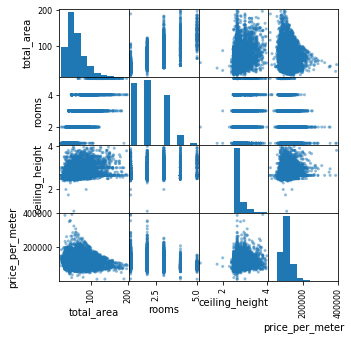

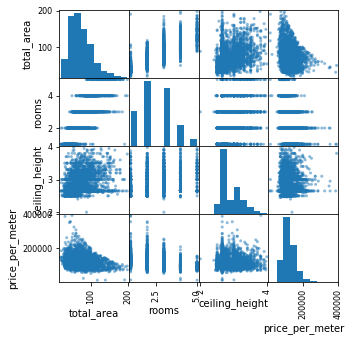

In [40]:
pd.plotting.scatter_matrix(
    data_flat_spb[['total_area', 'rooms', 'ceiling_height', 'price_per_meter']], figsize=(5, 5)
)

plt.show()
pd.plotting.scatter_matrix(
    data_flat_spb_9km[['total_area', 'rooms', 'ceiling_height', 'price_per_meter']], figsize=(5, 5)
)
plt.show()

### Шаг 5. Общий вывод

Из данных по объявлениям на продажу недвижимости можно селать вывод, что Количество объявлений в Санкт-Петербурге значительно первышает все остальные города, во всех городах наибольшая зависимость стоиости квартриы от общей площади, эти данные  совпадают общей картиной, при этом корреляция с колличесвом комнат меньше. Можно сделать выводы, что в центре в большей степени на стоимость квартиры влияет площадь, а колличество комнат второстепенный показатель.

Количесво объявлений из года в год увеличивается


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод